Documentation:

Aim: To explore the dataset and find useful insights
What has been done?
Correct date column and tried to answer some possible 
questions using dataset.

Questions?

1. Which Parent Sector's does startups fall in most.
2. Which Primary industry or sector has more number of startups.
3. During which year does most of the startups got fundings.
4. In which month startups get funding the most.
5. Which type of funding done by investor's the most for startups.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
%matplotlib inline

In [3]:
df = pd.read_csv('/content/cleaned-data1.csv')

In [4]:
df.head()

,LB ID,Primary name,URL,Region,Country,Parent sector,Initial invest date,PrimarySector_API,Platform zaps,Fund(s)
0,A11869,1Huddle,https://1huddle.co/,US - Non CA,US,HR / Education,2015-11-06,Professional training,SaaS,Fund III
1,A11789,3D Look,https://3dlook.me/,US - Non CA,US,Retail / eCommerce,2018-06-19,Fashion,SaaS,Istanbul
2,A11353,3TEN8,http://www.3ten8.ai/,US - CA,US,IT / Security,2017-07-21,IT tools,SaaS,Falcons
3,A10035,9Slides,http://9slides.com,US - Non CA,US,Media / Collaboration,2012-08-02,Media production,SaaS,Fund II
4,A10005,15Five,http://15five.com,US - Non CA,US,HR / Education,2012-12-20,Personnel / Benefits,SaaS,Fund II


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   LB ID                1226 non-null   object
 1   Primary name         1226 non-null   object
 2   URL                  1220 non-null   object
 3   Region               1226 non-null   object
 4   Country              1226 non-null   object
 5   Parent sector        1186 non-null   object
 6   Initial invest date  1214 non-null   object
 7   PrimarySector_API    1195 non-null   object
 8   Platform zaps        1178 non-null   object
 9   Fund(s)              1214 non-null   object
dtypes: object(10)
memory usage: 95.9+ KB


In [6]:
df['Initial invest date'] = df['Initial invest date'].astype('datetime64')

## 1. Which Parent Sector's does startups fall in most.

In [10]:
# Which Parent sector has more counts?

ps_vc = df['Parent sector'].value_counts()
print(ps_vc)


Retail / eCommerce              196
Marketing / Customer Success    162
Fintech                         159
Media / Collaboration           155
IT / Security                   152
HR / Education                  127
Real Estate / Transportation    113
Health / Biotech                 76
Smart Cities / Industrial        38
Consumer                          2
Fund                              2
Financial Technology              1
Software and Services             1
Hardware & Industrials            1
FinTech                           1
Name: Parent sector, dtype: int64


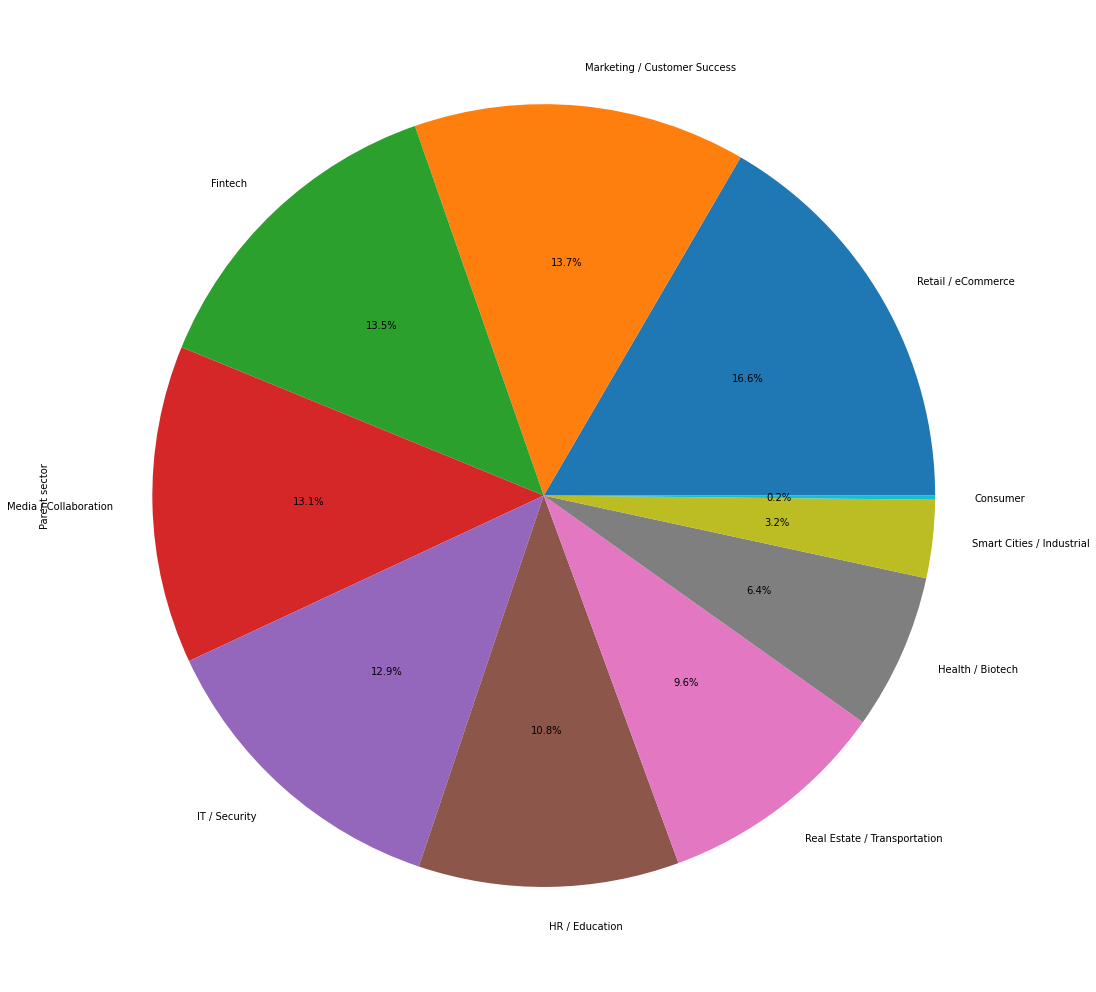

In [11]:
# Visualizing only top 10 results
plt.figure(figsize=(18,18))
ps_vc[:10].plot(kind = 'pie',autopct='%1.1f%%')
plt.show()

## 2. Which Primary industry or sector has more number of startups.

In [12]:
# Which Primary sector has more counts?

ps_vc = df['PrimarySector_API'].value_counts()
print(ps_vc)


Adtech / Martech       64
Market intel           60
Social media           51
IT tools               46
Fashion                45
                       ..
Infrastructure          1
Consumer Finance        1
Dietary Supplements     1
Telecoms                1
Manufacturing           1
Name: PrimarySector_API, Length: 106, dtype: int64


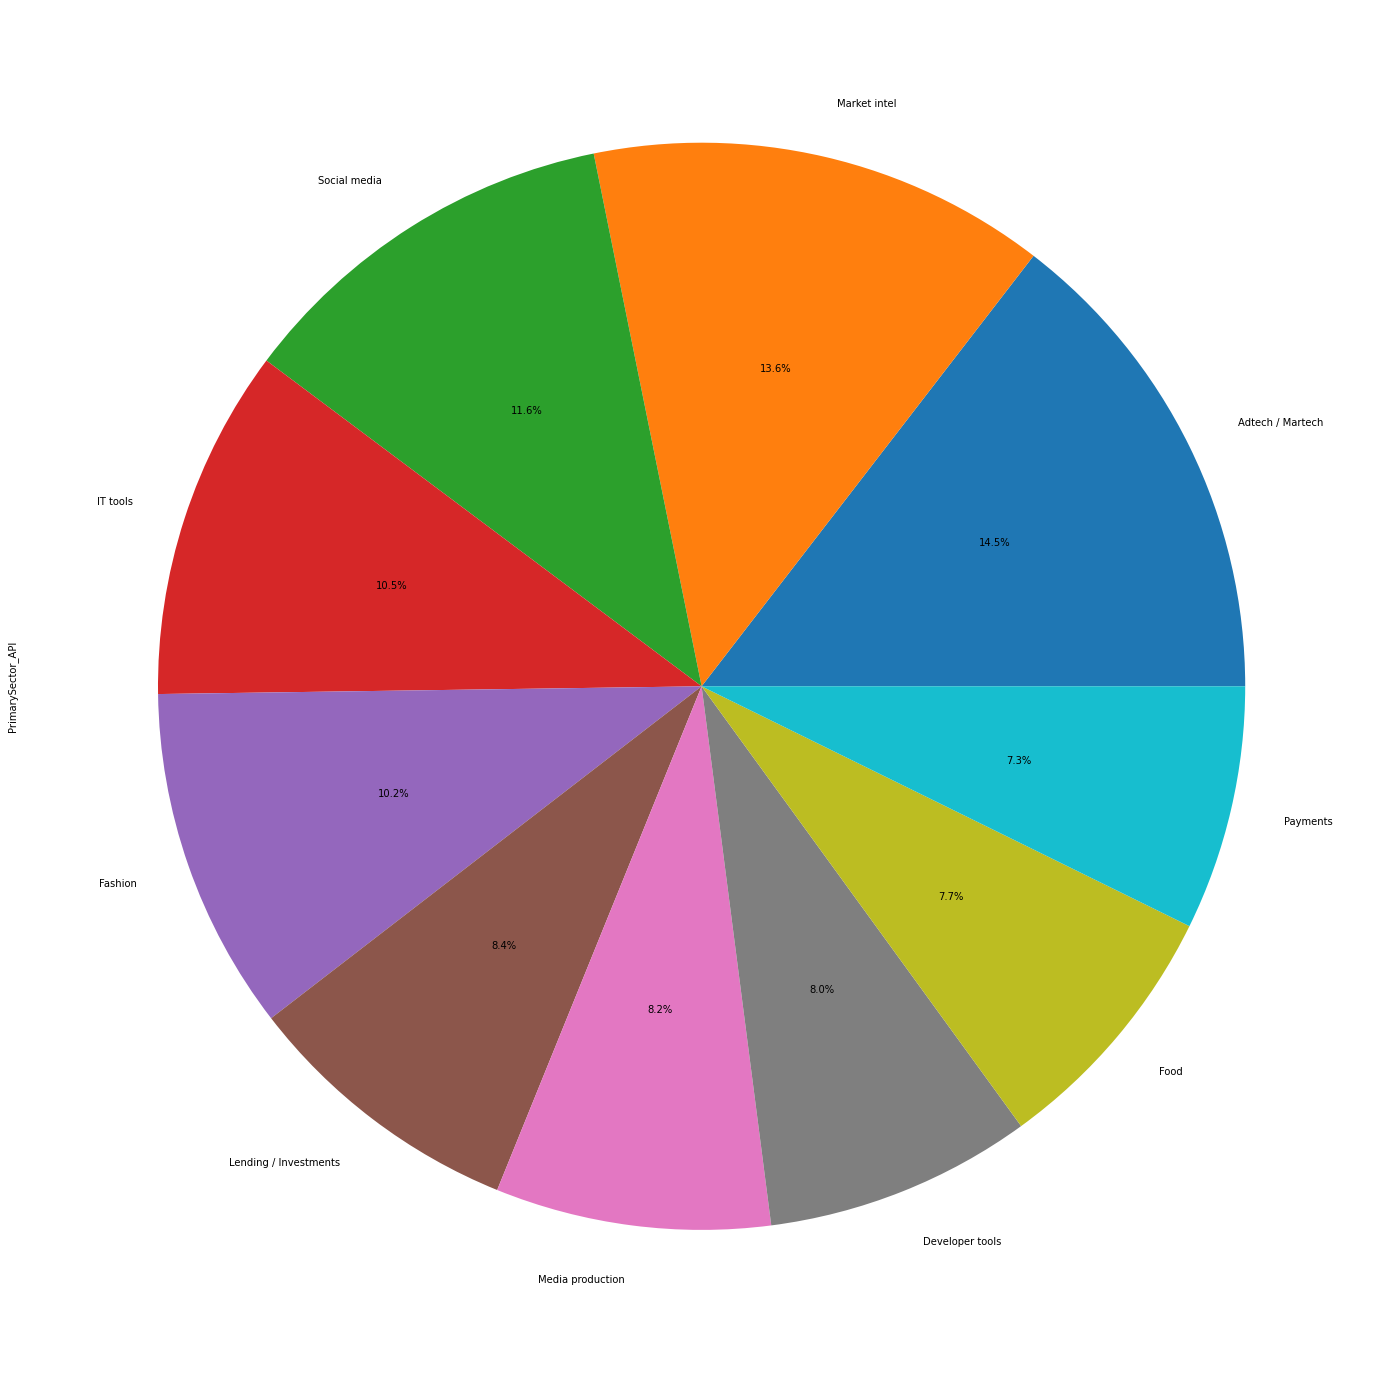

In [13]:
plt.figure(figsize=(25,25))
ps_vc[:10].plot(kind = 'pie',autopct='%1.1f%%')
plt.show()

## 3. During which year does most of the startups got fundings.
## 4. In which month startups get funding the most.

In [14]:
# During which year investment was high?
df['year'] = df['Initial invest date'].apply(lambda x:x.year)
df['month'] = df['Initial invest date'].apply(lambda x:x.month)

In [15]:
df.month

0       11.0
1        6.0
2        7.0
3        8.0
4       12.0
        ... 
1221     7.0
1222     4.0
1223     4.0
1224     4.0
1225     3.0
Name: month, Length: 1226, dtype: float64

In [35]:
y = df['year'].value_counts()
print(y)
print()

2015.0    197
2016.0    168
2014.0    147
2011.0    145
2012.0    135
2017.0    106
2013.0     94
2010.0     67
2019.0     57
2018.0     50
2020.0     45
2009.0      2
2021.0      1
Name: year, dtype: int64



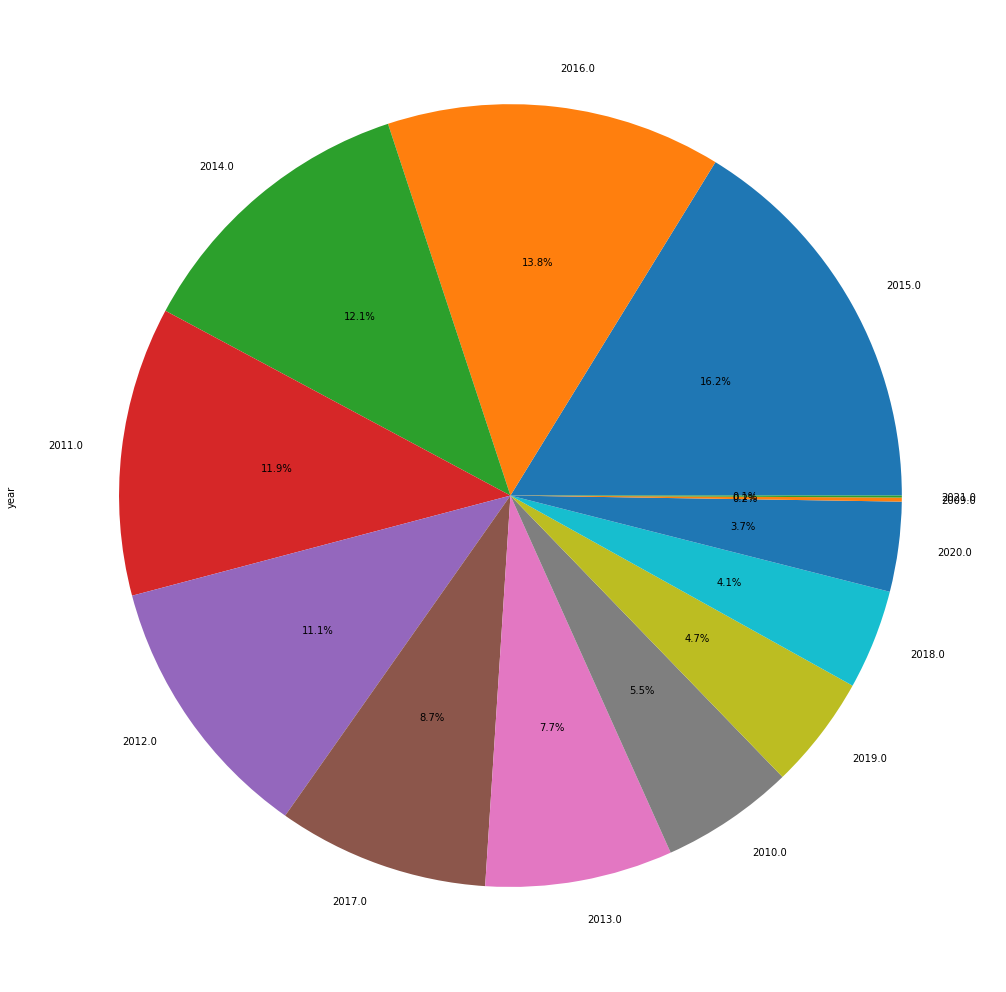

In [36]:

plt.figure(figsize=(18,18))

y.plot(kind = 'pie',autopct='%1.1f%%',subplots = True)
plt.show()

In [37]:
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthMapping = {}
for key,val in zip(sorted(df['month'].unique()[:-1]),mon):
  monthMapping[key] = val

In [38]:
monthMapping

{1.0: 'Jan',
 2.0: 'Feb',
 3.0: 'Mar',
 4.0: 'Apr',
 5.0: 'May',
 6.0: 'Jun',
 7.0: 'Jul',
 8.0: 'Aug',
 9.0: 'Sep',
 10.0: 'Oct',
 11.0: 'Nov',
 12.0: 'Dec'}

In [39]:
df['month'] = df['month'].map(monthMapping)

Aug    143
Oct    132
Apr    127
May    118
Jun    111
Nov    102
Sep     98
Jul     90
Feb     86
Dec     80
Mar     75
Jan     52
Name: month, dtype: int64



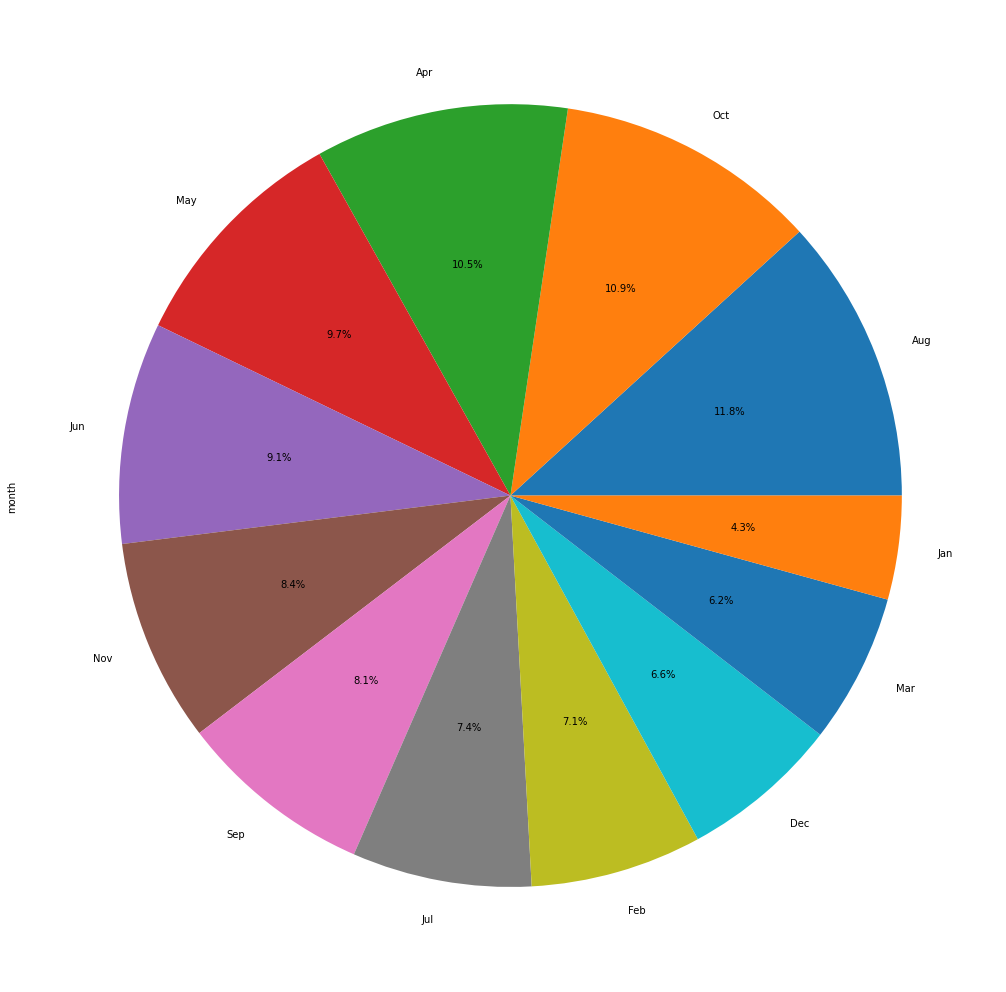

In [40]:
print(df['month'].value_counts())
print()
plt.figure(figsize=(18,18))
df['month'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')
plt.show()

## 5. Which type of funding done by investor's the most for startups.

In [41]:
# What are funds types?
df['Fund(s)'].unique()

array(['Fund III', 'Istanbul', 'Falcons', 'Fund II', 'Fund I', 'Kimchi I',
       'Fund IV', 'Fund IV,Fintech', 'Fund V', 'Annex, Fund I',
       'Durians I', 'Fund IV, Fintech', 'Fund IV, Vietnam',
       'Fintech, Vietnam', 'Fund III, Mobile', 'Mobile, Vietnam',
       'Fund III,Mobile', 'Fintech,Fund V', 'Fintech', 'Mobile',
       'Fund IV,Istanbul', 'Fund IV, Mobile', 'Vietnam', 'Canada',
       'Lucha I', nan, 'Vietnam, Fund V', 'Vietnam,Kimchi I',
       'Japan,Mobile', 'Fund III, Fintech', 'Durians I, Fund III',
       'TukTuks II,Durians III', 'TukTuks II,Durians II',
       'Fund I,Fund II', 'Durians,Fund III', 'Durians II',
       'Kimchi I, Fund V', 'Japan', 'Fund II,Fund III',
       'Fund III,Annex,Fund I', 'Fund I, Fund II', 'Fund II, Fund III',
       'Annex,Fund I', 'Fund IV,Fintech,Vietnam', 'Fund I, Fund III',
       'Lucha II', 'Korea II,Fund V', 'Durians I, Mobile',
       'Falcons, Fund V', 'Istanbul,Fund V', 'Fund V,Kimchi',
       'Fund IV, Istanbul', 'Fund V,Fu

In [42]:
# There is data disprencies in funds columns, First we need to handle them

In [43]:
def chainer(s):
  return list(chain.from_iterable(s.str.replace(' ','').str.split(',')))

In [53]:
len(chainer(df['Fund(s)']))

1331

In [54]:
funds = df['Fund(s)'].str.lstrip().str.rstrip().str.replace(' ','').str.split(',')

In [55]:
lens = funds.str.len()

In [56]:
lens

0       1
1       1
2       1
3       1
4       1
       ..
1221    1
1222    1
1223    2
1224    1
1225    2
Name: Fund(s), Length: 1226, dtype: int64

In [57]:
lens = lens.fillna(0)

In [58]:
df['Fund(s)'] = df['Fund(s)'].fillna('')

In [59]:
new_df = pd.DataFrame({
    'LB ID' : np.repeat(df['LB ID'].values,lens),
    'Primary name' : np.repeat(df['Primary name'].values,lens),
    'URL' : np.repeat(df['URL'].values,lens),
    'Region' : np.repeat(df['Region'].values,lens),
    'Country' : np.repeat(df['Country'].values,lens),
    'Parent sector' : np.repeat(df['Parent sector'].values,lens),
    'Initial invest date' : np.repeat(df['Initial invest date'].values,lens),
    'PrimarySector_API' : np.repeat(df['PrimarySector_API'].values,lens),
    'Platform zaps' : np.repeat(df['Platform zaps'].values,lens),
    'Fund(s)' : chainer(df['Fund(s)'])
}).reset_index().drop(columns = 'index')

In [60]:
new_df

,LB ID,Primary name,URL,Region,Country,Parent sector,Initial invest date,PrimarySector_API,Platform zaps,Fund(s)
0,A11869,1Huddle,https://1huddle.co/,US - Non CA,US,HR / Education,2015-11-06,Professional training,SaaS,FundIII
1,A11789,3D Look,https://3dlook.me/,US - Non CA,US,Retail / eCommerce,2018-06-19,Fashion,SaaS,Istanbul
2,A11353,3TEN8,http://www.3ten8.ai/,US - CA,US,IT / Security,2017-07-21,IT tools,SaaS,Falcons
3,A10035,9Slides,http://9slides.com,US - Non CA,US,Media / Collaboration,2012-08-02,Media production,SaaS,FundII
4,A10005,15Five,http://15five.com,US - Non CA,US,HR / Education,2012-12-20,Personnel / Benefits,SaaS,FundII
...,...,...,...,...,...,...,...,...,...,...
1326,A11259,Zowdow,http://www.quickly.co/,US - CA,US,Marketing / Customer Success,2015-04-24,Adtech / Martech,Mobile,FundIII
1327,A11259,Zowdow,http://www.quickly.co/,US - CA,US,Marketing / Customer Success,2015-04-24,Adtech / Martech,Mobile,Mobile
1328,A10141,Zya,http://zyamusic.com/,US - CA,US,Media / Collaboration,2016-04-29,Media production,SaaS,Mobile
1329,A10749,Zyudly Labs,http://zyudlylabs.com,US - CA,US,IT / Security,2017-03-01,Security,SaaS,FundIV


In [61]:
new_df['Fund(s)'].unique()

array(['FundIII', 'Istanbul', 'Falcons', 'FundII', 'FundI', 'KimchiI',
       'FundIV', 'Fintech', 'FundV', 'Annex', 'DuriansI', 'Vietnam',
       'Mobile', 'Canada', 'LuchaI', '', 'Japan', 'TukTuksII',
       'DuriansIII', 'DuriansII', 'Durians', 'LuchaII', 'KoreaII',
       'Kimchi', 'LuchaIII'], dtype=object)

FundIII       370
FundIV        230
FundI         218
FundII        201
FundV          81
Fintech        57
Mobile         37
Annex          27
Vietnam        24
Falcons        22
Istanbul       20
               12
KimchiI         7
DuriansI        5
Canada          3
LuchaI          3
DuriansII       3
TukTuksII       2
Japan           2
LuchaII         2
DuriansIII      1
LuchaIII        1
KoreaII         1
Kimchi          1
Durians         1
Name: Fund(s), dtype: int64



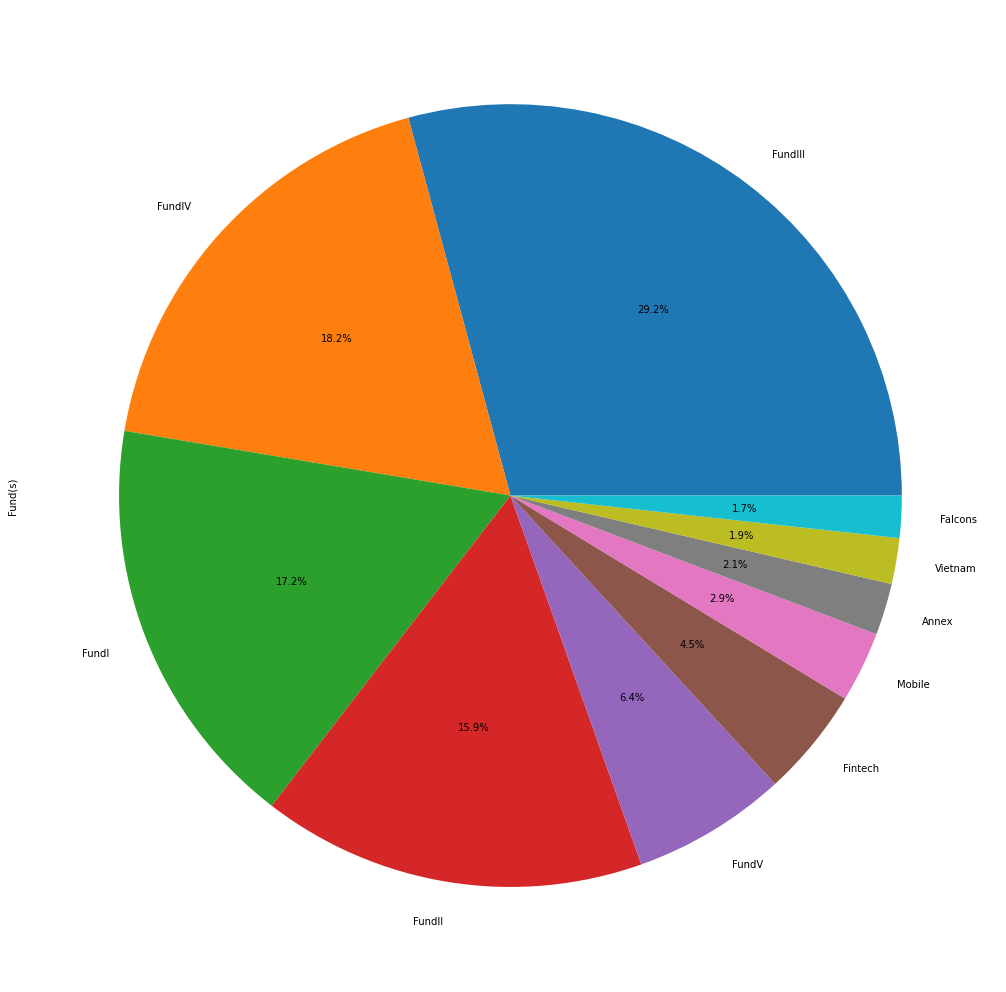

In [63]:
# Now data seems fine, lets find out which type of funding is most?
print(new_df['Fund(s)'].value_counts())
print()
plt.figure(figsize=(18,18))
new_df['Fund(s)'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%')
plt.show()